#### Note - Clustering is an unsupervised method and hence we are not concerned about train-test split or prediction accuracies.

## K-Means Clustering
**Parameter description**

n_clusters : The number of clusters to find.

n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : Maximum number of iterations of the k-means algorithm for a single run.


#### Simple Example to implement KMeans clustering algorithm using sklearn.cluster

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

print(X)
Y = pd.DataFrame(X,columns=['A','B'])
print("\n")
print(Y)

kmeans_object = KMeans(n_clusters=2, random_state=2)
kmeans_object.fit(X)
kmeans_object.labels_

[[1 2]
 [1 4]
 [1 0]
 [4 2]
 [4 4]
 [4 0]]


   A  B
0  1  2
1  1  4
2  1  0
3  4  2
4  4  4
5  4  0


array([1, 1, 1, 0, 0, 0])

In [2]:
kmeans_object.cluster_centers_

array([[4., 2.],
       [1., 2.]])

In [3]:
kmeans_object.predict([[0, 0], [4, 4]])

array([1, 0])

In [4]:
kmeans_object.inertia_

16.0

# Clustering - Cereals Dataset

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

##### Dataset Description
* name: Name of cereal
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: rating of the cereals (Possibly from Consumer Reports)

### Reading data

In [9]:
cereals = pd.read_csv("../input/Cereals.csv")
cereals.head(10)

name  calories  protein  fat  sodium  fiber  carbo  \
0                  100%_Bran        70        4    1     130   10.0    5.0   
1          100%_Natural_Bran       120        3    5      15    2.0    8.0   
2                   All-Bran        70        4    1     260    9.0    7.0   
3  All-Bran_with_Extra_Fiber        50        4    0     140   14.0    8.0   
4             Almond_Delight       110        2    2     200    1.0   14.0   
5    Apple_Cinnamon_Cheerios       110        2    2     180    1.5   10.5   
6                Apple_Jacks       110        2    0     125    1.0   11.0   
7                    Basic_4       130        3    2     210    2.0   18.0   
8                  Bran_Chex        90        2    1     200    4.0   15.0   
9                Bran_Flakes        90        3    0     210    5.0   13.0   

   sugars  potass  vitamins  shelf  weight  cups     rating  
0     6.0   280.0        25      3    1.00  0.33  68.402973  
1     8.0   135.0         0      3    1.00  1.00  33.983679  
2     5.0   320.0        25      3    1.00  0.33  59.425505  
3     0.0   330.0        25      3    1.00  0.50  93.704912  
4     8.0     NaN        25      3    1.00  0.75  34.384843  
5    10.0    70.0        25      1    1.00  0.75  29.509541  
6    14.0    30.0        25      2    1.00  1.00  33.174094  
7     8.0   100.0        25      3    1.33  0.75  37.038562  
8     6.0   125.0        25      1    1.00  0.67  49.120253  
9     5.0   190.0        25      3    1.00  0.67  53.313813

In [10]:
cereals.dtypes

name         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [11]:
cereals.shape

(77, 14)

### Aggregating "name", "shelf" and "rating" to make labels

In [12]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

In [13]:
cereals.shape

(77, 12)

# Data Exploration

In [14]:
cereals.head()

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0     6.0   280.0        25   
1       120        3    5      15    2.0    8.0     8.0   135.0         0   
2        70        4    1     260    9.0    7.0     5.0   320.0        25   
3        50        4    0     140   14.0    8.0     0.0   330.0        25   
4       110        2    2     200    1.0   14.0     8.0     NaN        25   

   weight  cups                                 label  
0     1.0  0.33                  100%_Bran (3 - 68.4)  
1     1.0  1.00         100%_Natural_Bran (3 - 33.98)  
2     1.0  0.33                  All-Bran (3 - 59.43)  
3     1.0  0.50  All-Bran_with_Extra_Fiber (3 - 93.7)  
4     1.0  0.75            Almond_Delight (3 - 34.38)

In [15]:
cereals.label.value_counts()

Maypo (2 - 54.85)                     1
Shredded_Wheat (1 - 68.24)            1
Raisin_Bran (2 - 39.26)               1
Life (2 - 45.33)                      1
Clusters (3 - 40.4)                   1
                                     ..
Cream_of_Wheat_(Quick) (2 - 64.53)    1
Bran_Chex (1 - 49.12)                 1
Corn_Pops (2 - 35.78)                 1
Crispy_Wheat_&_Raisins (3 - 36.18)    1
100%_Bran (3 - 68.4)                  1
Name: label, Length: 77, dtype: int64

### Check summary statistics

In [16]:
cereals.describe()

calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.802632   
std     19.484119   1.094790   1.006473   83.832295   2.383364   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins     weight       cups  
count  76.000000   75.000000   77.000000  77.000000  77.000000  
mean    7.026316   98.666667   28.246753   1.029610   0.821039  
std     4.378656   70.410636   22.342523   0.150477   0.232716  
min     0.000000   15.000000    0.000000   0.500000   0.250000  
25%     3.000000   42.500000   25.000000   1.000000   0.670000  
50%     7.000000   90.000000   25.000000   1.000000   0.750000  
75%    11.000000  120.000000   25.000000   1.000000   1.000000  
max    15.000000  330.000000  100.000000   1.500000   1.500000

### Decouple label from the features

In [17]:
cereal_label = cereals['label']

## Select all columns except "label"

cereals.drop('label', axis=1, inplace=True)

### Check missing values

In [18]:
cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
dtype: int64

### Imputation

In [21]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
imputed_cereals = pd.DataFrame(mean_imputer.fit_transform(cereals),columns=cereals.columns)

In [22]:
imputed_cereals.head()

calories  protein  fat  sodium  fiber  carbo  sugars      potass  vitamins  \
0      70.0      4.0  1.0   130.0   10.0    5.0     6.0  280.000000      25.0   
1     120.0      3.0  5.0    15.0    2.0    8.0     8.0  135.000000       0.0   
2      70.0      4.0  1.0   260.0    9.0    7.0     5.0  320.000000      25.0   
3      50.0      4.0  0.0   140.0   14.0    8.0     0.0  330.000000      25.0   
4     110.0      2.0  2.0   200.0    1.0   14.0     8.0   98.666667      25.0   

   weight  cups  
0     1.0  0.33  
1     1.0  1.00  
2     1.0  0.33  
3     1.0  0.50  
4     1.0  0.75

### Checking for NAs again

In [23]:
imputed_cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
cups        0
dtype: int64

### Standardization

In [24]:
standardizer = StandardScaler()
standardizer.fit(imputed_cereals)

std_X = standardizer.transform(imputed_cereals)
std_cereals = pd.DataFrame(std_X, columns=imputed_cereals.columns)

In [25]:
std_cereals.describe()

calories       protein           fat        sodium         fiber  \
count  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01   
mean  -1.258012e-16  5.767392e-17  1.013349e-16 -5.190653e-17  1.463476e-16   
std    1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00   
min   -2.938605e+00 -1.420902e+00 -1.013072e+00 -1.917189e+00 -9.088244e-01   
25%   -3.555846e-01 -5.014948e-01 -1.013072e+00 -3.563056e-01 -4.864980e-01   
50%    1.610194e-01  4.179123e-01 -1.298811e-02  2.440343e-01 -6.417167e-02   
75%    1.610194e-01  4.179123e-01  9.870962e-01  6.042382e-01  3.581547e-01   
max    2.744040e+00  3.176134e+00  3.987349e+00  1.924986e+00  5.003745e+00   

              carbo        sugars        potass      vitamins        weight  \
count  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01   
mean  -4.527403e-16 -2.144749e-16 -4.758099e-17  5.190653e-17 -1.982541e-16   
std    1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00   
min   -2.542013e+00 -1.625929e+00 -1.212115e+00 -1.272550e+00 -3.542628e+00   
25%   -7.267769e-01 -9.317120e-01 -7.774919e-01 -1.462701e-01 -1.980675e-01   
50%   -4.606439e-16 -6.089621e-03 -1.255577e-01 -1.462701e-01 -1.980675e-01   
75%    5.698204e-01  9.195328e-01  3.090651e-01 -1.462701e-01 -1.980675e-01   
max    2.125737e+00  1.845155e+00  3.351425e+00  3.232570e+00  3.146493e+00   

               cups  
count  7.700000e+01  
mean   1.665335e-16  
std    1.006557e+00  
min   -2.469891e+00  
25%   -6.532825e-01  
50%   -3.072619e-01  
75%    7.740527e-01  
max    2.936682e+00

In [26]:
kmeans_object = KMeans(n_clusters=5, random_state=1240)

kmeans_object.fit(std_cereals)
kmeans_clusters = kmeans_object.predict(std_cereals)

kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

label  kmeans_cluster
0                  100%_Bran (3 - 68.4)               4
1         100%_Natural_Bran (3 - 33.98)               3
2                  All-Bran (3 - 59.43)               4
3  All-Bran_with_Extra_Fiber (3 - 93.7)               4
4            Almond_Delight (3 - 34.38)               2

In [27]:
kmeans_object.labels_

array([4, 3, 4, 4, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 1, 1, 2, 2, 3, 0, 1,
       2, 0, 2, 2, 0, 3, 3, 2, 2, 2, 0, 0, 3, 2, 2, 2, 1, 3, 1, 0, 2, 0,
       3, 3, 3, 2, 2, 3, 0, 3, 3, 1, 0, 0, 0, 0, 3, 3, 0, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 3, 1, 1, 2, 0, 0, 2])

### Inspecting cluster centroids to understand average statistics of each cluster

In [29]:
# inverse_transform is used to Scale back the data to the original representation
cluster_centroids = pd.DataFrame(standardizer.inverse_transform(kmeans_object.cluster_centers_),columns=cereals.columns)   ## Using inverse_transform to retrive actual values from standardized data
cluster_centroids.to_csv("../output/best_kmeans_cluster_centroids.csv")
cluster_centroids

calories   protein       fat      sodium      fiber      carbo  \
0   93.043478  3.130435  0.521739  104.782609   2.378261  15.774027   
1  107.272727  2.090909  0.454545  247.272727   0.636364  20.454545   
2  110.434783  1.565217  1.043478  172.173913   0.652174  12.608696   
3  128.235294  3.117647  2.058824  157.352941   3.294118  14.235294   
4   63.333333  4.000000  0.666667  176.666667  11.000000   6.666667   

      sugars      potass   vitamins    weight      cups  
0   3.305492   98.855072  17.391304  0.949130  0.809565  
1   3.090909   45.909091  52.272727  1.000000  1.034545  
2  11.086957   51.463768  25.000000  1.000000  0.875217  
3   9.705882  159.117647  32.352941  1.202941  0.701765  
4   3.666667  310.000000  25.000000  1.000000  0.386667

In [30]:

from sklearn.metrics import silhouette_samples, silhouette_score
wss= {}
for k in range(2, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,n_jobs=2,random_state=1000,verbose=0).fit(std_cereals)
    clusters = kmeans_loop.labels_
    labels = kmeans_loop.predict(std_cereals)
    print(silhouette_score(std_cereals, labels))
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center

0.21735076008649726
0.17149087598542434
0.20839328452574316
0.2501020816861865
0.2482984792570507
0.292608536591621
0.3006272555499242
0.3144268815290721
0.26681952502197026
0.2867834840131613
0.3191244628132775
0.30315722519847543
0.3120528411876249
0.3285853178626663
0.3254449337634043
0.31936692770977276
0.3042807748534382
0.2998441107973061
0.281492036676644


In [31]:
print(wss)

{2: 686.1907115207284, 3: 584.7237118058638, 4: 489.2454641375005, 5: 411.6473261000441, 6: 354.24493350305426, 7: 314.03022959743225, 8: 276.2790231881626, 9: 247.42481441736913, 10: 229.8360075538547, 11: 207.5189681359663, 12: 188.17502321694695, 13: 168.9885864397974, 14: 153.09943358938295, 15: 141.726492321529, 16: 134.13081471557894, 17: 129.23199501805345, 18: 122.36999466018688, 19: 116.59112466958399, 20: 113.5074076192916}


In [32]:
wss.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [33]:
wss.values()

dict_values([686.1907115207284, 584.7237118058638, 489.2454641375005, 411.6473261000441, 354.24493350305426, 314.03022959743225, 276.2790231881626, 247.42481441736913, 229.8360075538547, 207.5189681359663, 188.17502321694695, 168.9885864397974, 153.09943358938295, 141.726492321529, 134.13081471557894, 129.23199501805345, 122.36999466018688, 116.59112466958399, 113.5074076192916])

In [34]:
list(wss.keys())

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [35]:
import matplotlib.pyplot as plt
plt.figure()
# %matplotlib notebook
plt.plot(list(wss.keys()),list(wss.values()) ,marker='o')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

<Figure size 640x480 with 1 Axes>

### How to select best K value for K-Means -> Silhouette Analysis
**Higher the silhouette score better the clustering**

*The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.*

### Note - Higher the silhouette score better the clustering.
Hence best K value for this dataset is 8-9

In [36]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(std_cereals)
best_kmeans_labels = best_kmeans.predict(std_cereals)

In [37]:
kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

label  kmeans_cluster
0                  100%_Bran (3 - 68.4)               6
1         100%_Natural_Bran (3 - 33.98)               3
2                  All-Bran (3 - 59.43)               6
3  All-Bran_with_Extra_Fiber (3 - 93.7)               6
4            Almond_Delight (3 - 34.38)               2

### Add Cluster Labels to Original Data

In [39]:
cereals = pd.read_csv("../input/Cereals.csv")
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

final_cluster_data = pd.merge(cereals, kmeans_results, on='label')
final_cluster_data.head(10)


calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0     6.0   280.0        25   
1       120        3    5      15    2.0    8.0     8.0   135.0         0   
2        70        4    1     260    9.0    7.0     5.0   320.0        25   
3        50        4    0     140   14.0    8.0     0.0   330.0        25   
4       110        2    2     200    1.0   14.0     8.0     NaN        25   
5       110        2    2     180    1.5   10.5    10.0    70.0        25   
6       110        2    0     125    1.0   11.0    14.0    30.0        25   
7       130        3    2     210    2.0   18.0     8.0   100.0        25   
8        90        2    1     200    4.0   15.0     6.0   125.0        25   
9        90        3    0     210    5.0   13.0     5.0   190.0        25   

   weight  cups                                 label  kmeans_cluster  
0    1.00  0.33                  100%_Bran (3 - 68.4)               6  
1    1.00  1.00         100%_Natural_Bran (3 - 33.98)               3  
2    1.00  0.33                  All-Bran (3 - 59.43)               6  
3    1.00  0.50  All-Bran_with_Extra_Fiber (3 - 93.7)               6  
4    1.00  0.75            Almond_Delight (3 - 34.38)               2  
5    1.00  0.75   Apple_Cinnamon_Cheerios (1 - 29.51)               2  
6    1.00  1.00               Apple_Jacks (2 - 33.17)               2  
7    1.33  0.75                   Basic_4 (3 - 37.04)               7  
8    1.00  0.67                 Bran_Chex (1 - 49.12)               0  
9    1.00  0.67               Bran_Flakes (3 - 53.31)               0

In [40]:
final_cluster_data.shape

(77, 13)

In [41]:
final_cluster_data.kmeans_cluster.value_counts()

2    23
0    17
3    10
7     8
1     7
4     6
6     3
5     3
Name: kmeans_cluster, dtype: int64

### Post-Process Clusters 

In [42]:
analysis = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
analysis

kmeans_cluster    calories   protein       fat      sodium      fiber  \
0               0   97.058824  3.058824  0.352941  115.882353   2.588235   
1               1  108.571429  1.857143  0.285714  261.428571   0.285714   
2               2  110.434783  1.565217  1.043478  172.173913   0.652174   
3               3  117.000000  3.800000  2.700000  119.500000   2.620000   
4               4  116.666667  2.666667  0.833333  208.333333   1.833333   
5               5   60.000000  1.666667  0.000000    0.000000   1.333333   
6               6   63.333333  4.000000  0.666667  176.666667  11.000000   
7               7  130.000000  3.000000  1.500000  195.000000   3.812500   

       carbo     sugars      potass    vitamins    weight      cups  
0  16.470588   3.647059  106.562500   20.588235  1.000000  0.766471  
1  21.571429   2.714286   36.428571   25.000000  1.000000  1.054286  
2  12.608696  11.086957   49.318182   25.000000  1.000000  0.875217  
3  12.833333   7.000000  129.000000   20.000000  1.000000  0.742000  
4  18.166667   6.333333   95.833333  100.000000  1.133333  0.958333  
5  13.000000   0.000000   53.333333    0.000000  0.610000  1.000000  
6   6.666667   3.666667  310.000000   25.000000  1.000000  0.386667  
7  15.062500  10.750000  175.000000   25.000000  1.331250  0.668750

In [43]:
final_cluster_data.kmeans_cluster.value_counts()

2    23
0    17
3    10
7     8
1     7
4     6
6     3
5     3
Name: kmeans_cluster, dtype: int64



## Agglomerative Clustering
**Parameter description**

n_clusters : The number of clusters to find.


linkage : {“ward”, “complete”, “average”}

- ward minimizes the variance of the clusters being merged.
- complete uses the maximum distances between all observations of the two sets.
- average uses the average of the distances of each observation of the two sets.

affinity : {“euclidean”, “manhattan”, “cosine”}

<IPython.core.display.Javascript object>


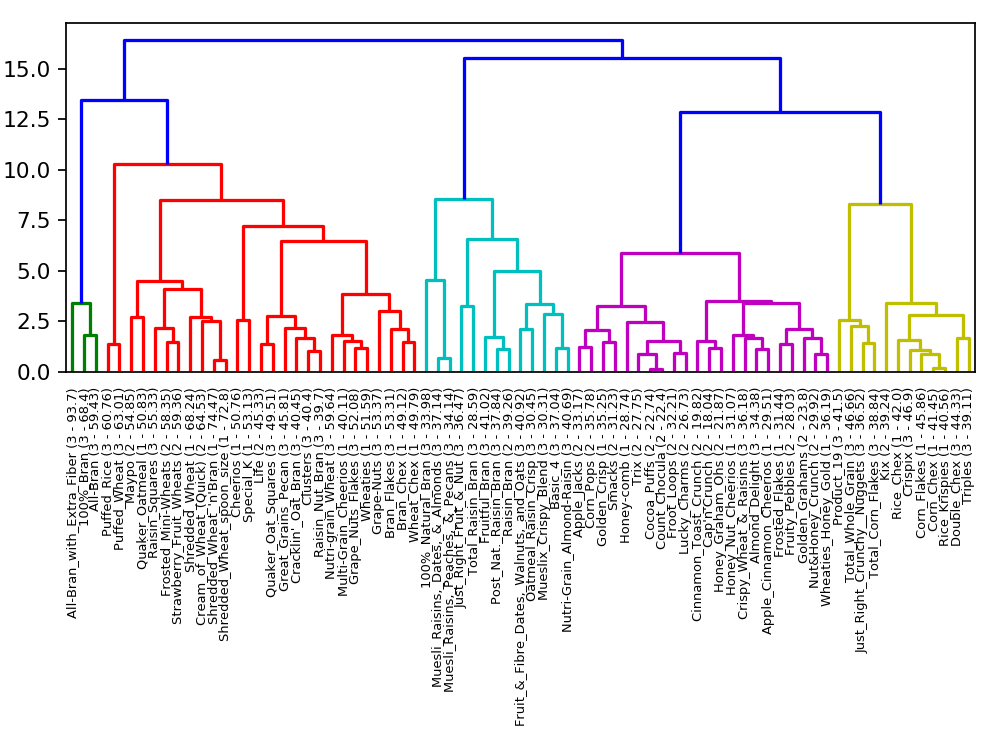

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [44]:
#import matplotlib.pyplot as plt
%matplotlib notebook
# plt.figure()

from scipy.cluster.hierarchy import linkage, dendrogram

# Preparing linkage matrix
linkage_matrix = linkage(std_cereals, method='ward',metric='euclidean')

fig, axs = plt.subplots()
dendrogram(linkage_matrix,labels=cereal_label.as_matrix())
plt.tight_layout()
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering

## Instantiating object
agg_clust = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
agg_clust.fit(std_cereals)
## Training model and return class labels
agg_clusters = agg_clust.fit_predict(std_cereals)

## Label - Cluster
agg_result = pd.DataFrame({"label":cereal_label,"agg_cluster":agg_clusters}).sort_values('agg_cluster')
agg_result.head()

label  agg_cluster
49          Nutri-Grain_Almond-Raisin (3 - 40.69)            0
1                   100%_Natural_Bran (3 - 33.98)            0
46               Mueslix_Crispy_Blend (3 - 30.31)            0
45  Muesli_Raisins,_Peaches,_&_Pecans (3 - 34.14)            0
44   Muesli_Raisins,_Dates,_&_Almonds (3 - 37.14)            0

In [46]:
agg_clusters

array([3, 0, 3, 3, 4, 4, 4, 0, 2, 2, 4, 2, 4, 2, 4, 1, 1, 4, 4, 2, 2, 1,
       4, 1, 4, 4, 2, 0, 0, 4, 4, 4, 2, 2, 2, 4, 4, 4, 1, 0, 1, 2, 4, 2,
       0, 0, 0, 2, 4, 0, 2, 0, 0, 1, 5, 5, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2,
       4, 2, 2, 1, 0, 1, 1, 4, 2, 2, 4], dtype=int64)

#### References:

* https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/
* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html